### Frequency of Answers for Questions 1 and 2

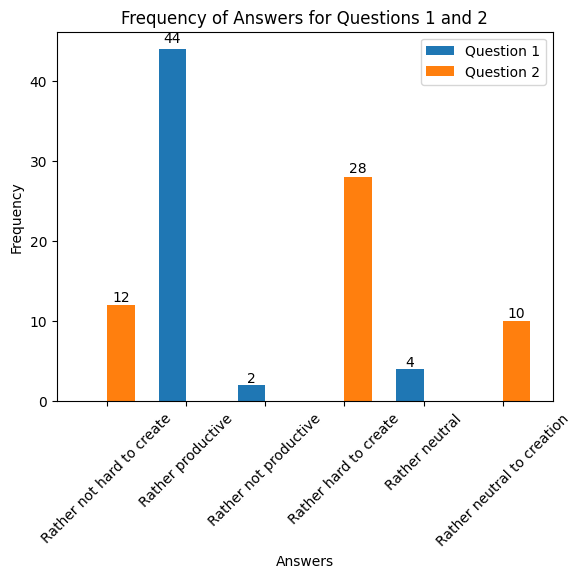

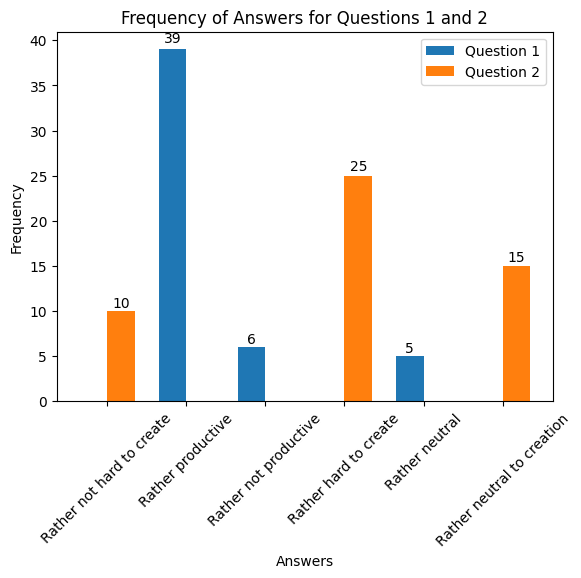

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sheets = pd.read_excel("posts100_tagged_with_GPT4.xlsx", sheet_name=None)
for sheet_name, df in sheets.items():
    # Count frequencies
    freq1 = df['GPT Grade1'].value_counts()
    freq2 = df['GPT Grade2'].value_counts()
    
    # Custom order for the x-axis labels
    custom_order = ['Rather not hard to create', 'Rather productive', 'Rather not productive', 'Rather hard to create', 'Rather neutral', 'Rather neutral to creation']
    
    # Ensure both series have the same index for proper comparison and reindex with custom order
    freq1 = freq1.reindex(custom_order, fill_value=0)
    freq2 = freq2.reindex(custom_order, fill_value=0)

    # Filter out zero values
    mask = (freq1 > 0) | (freq2 > 0)
    freq1 = freq1[mask]
    freq2 = freq2[mask]
    filtered_custom_order = [answer for answer in custom_order if mask.get(answer, False)]

    # Plotting
    fig, ax = plt.subplots()
    index = np.arange(len(filtered_custom_order))  # Use the length of filtered custom order for index
    bar_width = 0.35

    rects1 = ax.bar(index, freq1.values, bar_width, label='Question 1')
    rects2 = ax.bar(index + bar_width, freq2.values, bar_width, label='Question 2')

    # Adding text labels on bars
    for rect in rects1:
        height = rect.get_height()
        if height > 0:  # Only add labels to non-zero bars
            ax.text(rect.get_x() + rect.get_width() / 2., 1.01*height,
                    '%d' % int(height),
                    ha='center', va='bottom')
    for rect in rects2:
        height = rect.get_height()
        if height > 0:  # Only add labels to non-zero bars
            ax.text(rect.get_x() + rect.get_width() / 2., 1.01*height,
                    '%d' % int(height),
                    ha='center', va='bottom')

    ax.set_xlabel('Answers')
    ax.set_ylabel('Frequency')
    ax.set_title('Frequency of Answers for Questions 1 and 2')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(filtered_custom_order)
    ax.legend()

    plt.xticks(rotation=45)  # Adjust rotation for better readability
    plt.show()


### Word Cloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yuval\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yuval\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


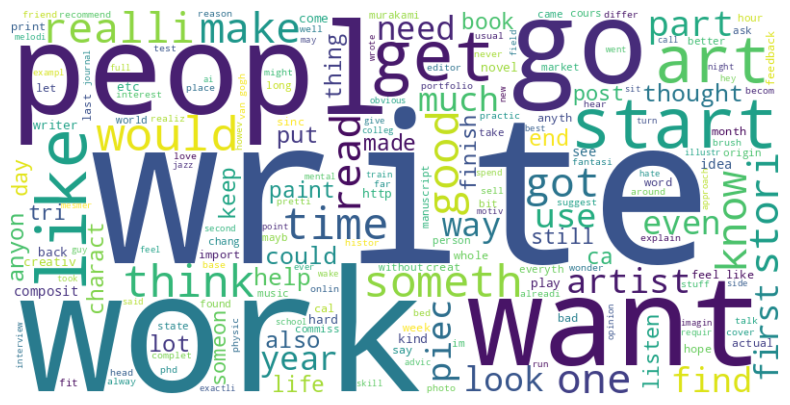

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yuval\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yuval\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


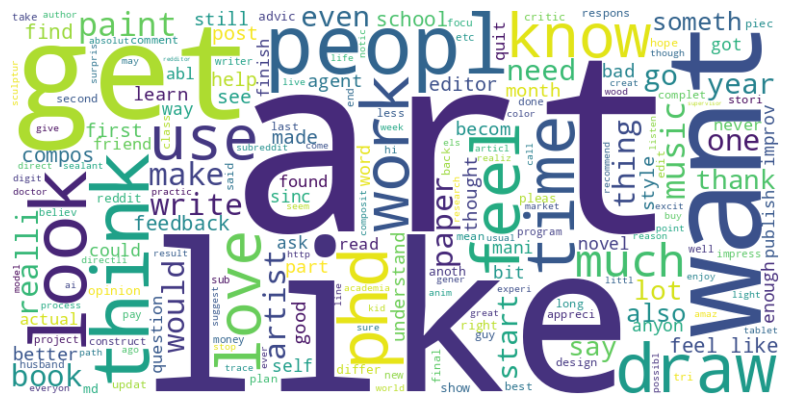

In [11]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer



sheets = pd.read_excel("posts100_tagged_with_GPT4.xlsx", sheet_name=None)
for sheet_name, df in sheets.items():
    text_data = ' '.join(df['Post'].dropna())  # Concatenate text, dropping any NaN values
    stemmer = PorterStemmer()
    # Make sure you've downloaded the required NLTK resources
    nltk.download('punkt')
    nltk.download('stopwords')

    # Tokenize and clean the text
    words = word_tokenize(text_data.lower())  # Convert text to lower case and tokenize
    filtered_words = [word for word in words if word.isalpha() and word not in stopwords.words('english')]
    stemmed_words = [stemmer.stem(token) for token in filtered_words]
    cleaned_text = ' '.join(stemmed_words)  # Recombine into single string without stopwords
    # Example with more customization
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        max_words=200,
        colormap='viridis',  # Use matplotlib colormap
        stopwords=stopwords.words('english')
    ).generate(cleaned_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


### unusual words

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yuval\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yuval\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


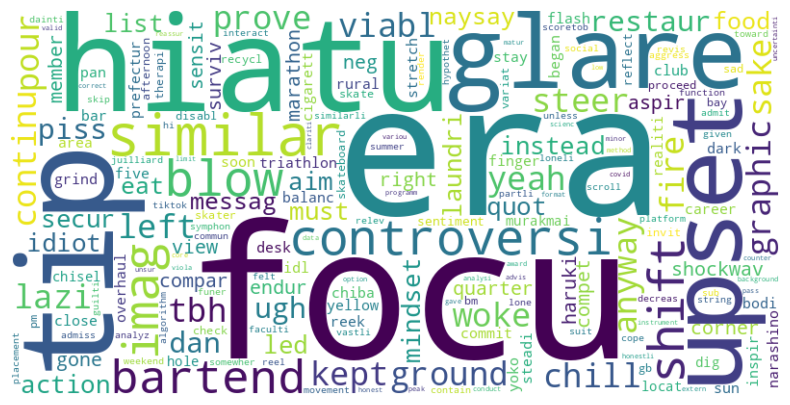

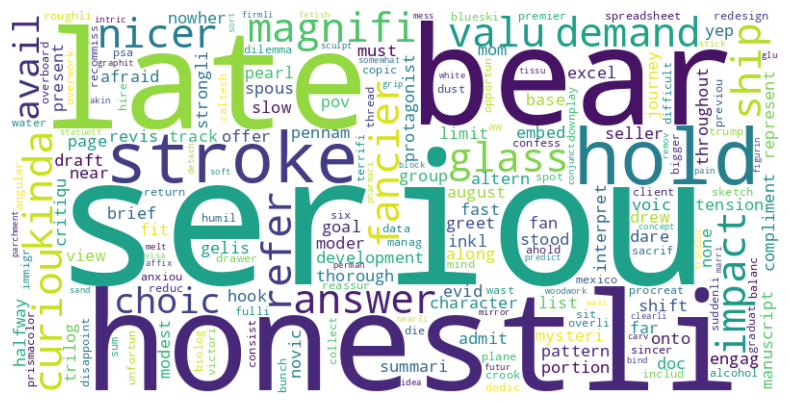

In [7]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.probability import FreqDist
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer

# Download necessary resources
nltk.download('punkt')
nltk.download('stopwords')

# Define a function to clean and tokenize text
def clean_tokenize(text):
    tokens = word_tokenize(text.lower())  # tokenize and convert to lower case
    # remove punctuation and stopwords
    stemmer = PorterStemmer()
    filtered_words = [token for token in tokens if token not in stopwords.words('english') and token.isalpha()]
    stemmed_words = [stemmer.stem(token) for token in filtered_words]
    return stemmed_words

def find_unusual_words(tokens):
        return [word for word in tokens if word in unusual_words]

sheets = pd.read_excel("posts100_tagged_with_GPT4.xlsx", sheet_name=None)
for sheet_name, df in sheets.items():
    # Apply the function to each post
    df['Tokens'] = df['Post'].apply(clean_tokenize)

    # Flatten the list of tokens and compute the frequency distribution
    all_tokens = [token for sublist in df['Tokens'] for token in sublist]
    freq_dist = FreqDist(all_tokens)

    # Extract words that appear only once
    unusual_words = [word for word, count in freq_dist.items() if count == 1]
    text = ' '.join(unusual_words)


    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off the axis labels
    plt.show()


### Common words and Unusual words

In [6]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.probability import FreqDist
import pandas as pd


# Download necessary resources
nltk.download('punkt')
nltk.download('stopwords')

# Define a function to clean and tokenize text
def clean_tokenize(text):
    tokens = word_tokenize(text.lower())  # tokenize and convert to lower case
    # remove punctuation and stopwords
    tokens = [token for token in tokens if token not in stopwords.words('english') and token.isalpha()]
    return tokens
sheets = pd.read_excel("posts100_tagged_with_GPT4.xlsx", sheet_name=None)
for sheet_name, df in sheets.items():
    # Apply the function to each post
    print(f"Sheet: {sheet_name}")
    df['Tokens'] = df['Post'].apply(clean_tokenize)

    # Flatten the list of tokens and compute the frequency distribution
    all_tokens = [token for sublist in df['Tokens'] for token in sublist]
    freq_dist = FreqDist(all_tokens)

    # Print some statistics
    print("Common words:", freq_dist.most_common(10))  # Print the 10 most common words
    # Extract words that appear only once
    unusual_words = [word for word, count in freq_dist.items() if count == 1]
    print("Unusual words:", unusual_words)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yuval\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yuval\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Sheet: sport and art users posts
Common words: [('like', 34), ('writing', 32), ('people', 30), ('work', 28), ('get', 23), ('art', 22), ('would', 22), ('something', 19), ('good', 19), ('want', 19)]
Unusual words: ['hiatus', 'tips', 'rocks', 'reducing', 'glare', 'acrylics', 'upset', 'hiring', 'uses', 'similar', 'controversy', 'blow', 'image', 'alters', 'constructive', 'rant', 'nights', 'shift', 'bartending', 'ground', 'pour', 'left', 'fired', 'chilled', 'woke', 'graphic', 'designer', 'yeah', 'learn', 'talking', 'prove', 'sake', 'hate', 'tbh', 'lazy', 'viable', 'anyway', 'continued', 'kept', 'steer', 'peoples', 'owning', 'restaurant', 'skills', 'fuck', 'pisses', 'mentions', 'bringing', 'knows', 'friend', 'dan', 'ugh', 'frustrating', 'instead', 'giving', 'laundry', 'list', 'reasons', 'must', 'convince', 'others', 'aim', 'quote', 'mindset', 'actions', 'led', 'experiences', 'idiots', 'dreams', 'train', 'security', 'message', 'naysayers', 'food', 'eat', 'quarter', 'aspirations', 'compare', 't